In [16]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [2]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
x_train = x_train.reshape(x_train.shape[0], 28,28, 1)
x_test = x_test.reshape(x_test.shape[0], 28,28, 1)
input_shape = (28, 28, 1)

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
x_train /= 255
x_test /= 255

Neural networks work better with floats

    During training, the model updates weights using very small decimal values (gradients).
    If data stays as integers, fractional updates (like 0.001) cannot be represented.

Normalization

    Usually, after converting to float32, we scale pixel values to the range 0–1 by dividing by 255.0:
    x_train = x_train.astype('float32') / 255.0
    x_test  = x_test.astype('float32') / 255.0
    This makes training faster and more stable.

Compatibility with TensorFlow/Keras operations

    Most Keras layers (Conv2D, Dense, etc.) expect inputs in float32 by default.
    Keeping uint8 may cause unexpected errors or slower training.

In [8]:
#Model Creation
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
#https://keras.io/api/optimizers/
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x=x_train,y=y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 34s 17ms/step - loss: 0.1954 - accuracy: 0.9409
Epoch 2/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0778 - accuracy: 0.9758
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0545 - accuracy: 0.9828
Epoch 4/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0419 - accuracy: 0.9864
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0327 - accuracy: 0.9886
Epoch 6/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0278 - accuracy: 0.9906
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0242 - accuracy: 0.9919
Epoch 8/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.0208 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.0208 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 32s 17m

🔹 1. model.compile(...)
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    (a) optimizer='adam'
    
        Chooses the optimization algorithm.
        Adam = Adaptive Moment Estimation → the most commonly used optimizer.
        It updates weights efficiently and usually converges faster.
    
    (b) loss='sparse_categorical_crossentropy'
    
        Defines the loss function (how we measure error).
        Used for multi-class classification (e.g., MNIST digits 0–9).
        “sparse” means the labels (y_train) are integers like [0, 1, 2, ..., 9], not one-hot vectors.
        
        Example:
            
            If label = 3, you just pass 3.
            Without “sparse”, you’d need [0,0,0,1,0,0,0,0,0,0].
            
    (c) metrics=['accuracy']
    
        Extra measure to evaluate performance.
        Accuracy = percentage of correct predictions.
        This won’t affect training but is useful for monitoring.

🔹 2. model.fit(...)
        model.fit(x=x_train, y=y_train, epochs=10)
        
            This trains the model.
            x_train = training data (images).
            y_train = labels (digits 0–9).
            epochs=10 = number of passes through the entire dataset.
    
    👉 During each epoch:
            Model makes predictions.
            Loss is calculated (sparse_categorical_crossentropy).
            Optimizer (Adam) updates weights.
            Accuracy and loss are reported.
        
    🔹 Example Output (simplified)
            Epoch 1/10
            1875/1875 [==============================] - 10s 4ms/step - loss: 0.2500 - accuracy: 0.9270
            Epoch 2/10
            1875/1875 [==============================] - 8s 4ms/step - loss: 0.1000 - accuracy: 0.9700
            ...
            Epoch 10/10
            1875/1875 [==============================] - 8s 4ms/step - loss: 0.0300 - accuracy: 0.9900
    
        Loss decreases (0.25 → 0.03).
        Accuracy increases (92% → 99%).

✅ Summary:

    compile = prepare model (set optimizer, loss, metrics).
    fit = train the model (optimize weights over epochs).
    With Adam + sparse categorical crossentropy, you’re training a multi-class classifier efficiently.

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0646 - accuracy: 0.9858


[0.06463200598955154, 0.98580002784729]

In [13]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test)

313/313 [==============================] - 2s 5ms/step


In [14]:
y_predicts=np.argmax(y_predict, axis=1) # Here we get the index of maximum value in the encoded vector

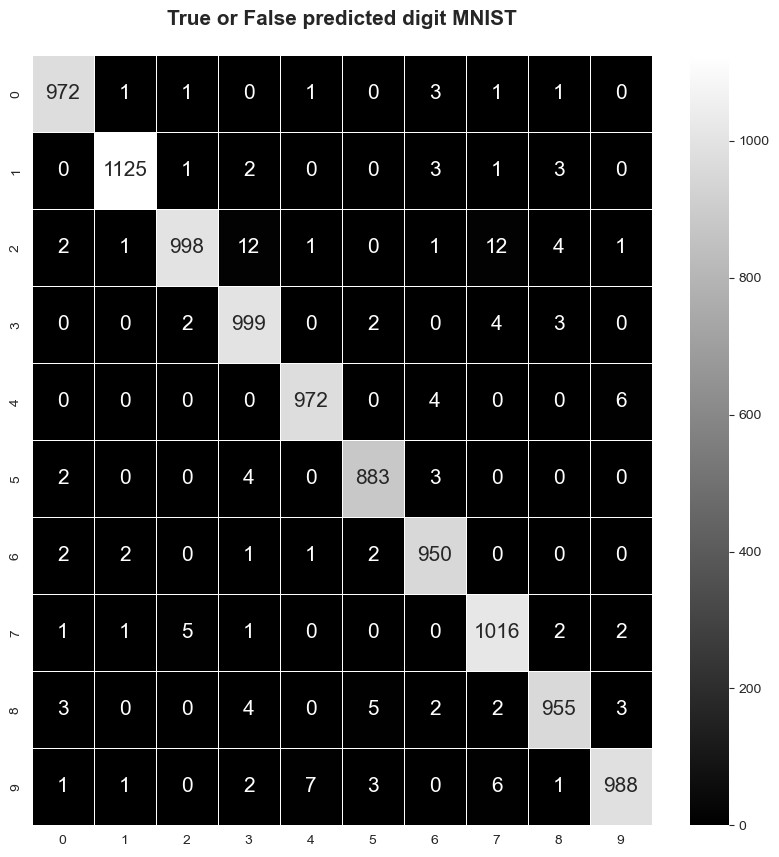

In [17]:
#Confusion matrix for Digit MNIST
from sklearn.metrics import confusion_matrix
con_mat=confusion_matrix(y_test,y_predicts)
#plt.style.use('seaborn-deep')
sns.set_style("whitegrid")
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

1/1 [==============================] - 0s 25ms/step
3


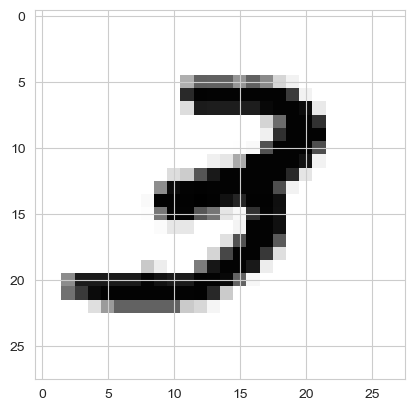

In [19]:
import matplotlib.pyplot as plt
image_index = 6950
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
predict = x_test[image_index].reshape(28,28)
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())